#Actividad 1
Es importante que realices todas las actividades, estas te permitirán saber como vas avanzando y podrás reflexionar sobre la teoría si te queda alguna duda de cómo hacer esta actividad por favor consultanos en el campus.
El objetivo de esta actividad es encontrar una posible relación o linealidad entre el PIB (Producto Interno Bruto) de diferentes países del mundo. Los datos fueron descargados del sitio del Banco Mundial.

El método que seguiremos es el siguiente:

*   Preparación y organización de datos
*   Exploración de los datos
*   Modelado de datos

Debes descargar el archivo BancoMundial.ipynb del repositorio de la materia. Realiza las
pruebas necesarias para identificar ¿qué países o combinación de países tendrían la
mayor relación con el PIB (Producto Interno Bruto) mundial?

In [ ]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df_pbi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AA clase 4/pib_banco_mundial_50.csv', delimiter= ';')
df_pbi.head()


,Country Name,Country Code,2019,2020,2021,2022,2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [ ]:
df_pbi.info()
df_pbi.describe()
df_pbi.columns
df_pbi.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  51 non-null     object 
 1   Country Code  51 non-null     object 
 2   2019          51 non-null     float64
 3   2020          51 non-null     float64
 4   2021          51 non-null     float64
 5   2022          51 non-null     float64
 6   2023          51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


,0
Country Name,0
Country Code,0
2019,0
2020,0
2021,0
2022,0
2023,0


In [ ]:
# Se elimina las columnas que no son relevantes para el estudio. En este caso la columna "Country Code"

df_pbi.drop('Country Code', axis=1, inplace=True)
df_pbi.head()

,Country Name,2019,2020,2021,2022,2023
0,Argentina,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12


In [ ]:
# Se traspone el df por que es mejor para la interpretación.
df_pbi_t = df_pbi.set_index('Country Name').T
df_pbi_t.head()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


In [ ]:
#Transformación de los datos a tipo numerico
df_pbi_t= df_pbi_t.apply(pd.to_numeric)
df_pbi_t.tail()

Country Name,Argentina,Brazil,United States,China,India,Germany,France,United Kingdom,Italy,Spain,...,Norway,Denmark,Finland,Poland,Czech Republic,Hungary,Greece,Portugal,Netherlands,World
2019,1.492100e+12,8.961000e+11,2.164700e+12,8.600000e+09,8.261000e+11,1.740500e+12,6.020000e+11,2.299700e+12,7.559000e+11,3.763000e+11,...,8.252000e+11,1.230300e+12,5.497000e+11,2.031000e+11,1.820100e+12,2.118500e+12,7.337000e+11,1.138000e+11,9.981000e+11,5.857570e+13
2020,5.090000e+11,2.279500e+12,6.277000e+11,1.491000e+11,1.537000e+12,1.451500e+12,6.402000e+11,1.399400e+12,2.445200e+12,4.963000e+11,...,3.935000e+11,2.656000e+11,1.230000e+12,2.322400e+12,1.978400e+12,1.562700e+12,3.544000e+11,1.863200e+12,2.374600e+12,6.451670e+13
2021,2.781000e+11,1.978400e+12,6.323000e+11,1.204200e+12,2.098200e+12,1.356700e+12,1.836300e+12,7.928000e+11,7.028000e+11,5.665000e+11,...,1.992000e+11,1.491300e+12,1.856500e+12,2.116300e+12,3.443000e+11,2.447900e+12,5.649000e+11,1.225700e+12,2.095300e+12,6.172130e+13
2022,7.350000e+11,1.322700e+12,1.705900e+12,2.200000e+12,2.001300e+12,1.823800e+12,2.447700e+12,1.191400e+12,1.006100e+12,6.679000e+11,...,1.422300e+12,2.127700e+12,6.803000e+11,1.494800e+12,1.727000e+11,2.110900e+12,3.052000e+11,4.290000e+10,1.860600e+12,6.391170e+13
2023,1.361300e+12,1.234500e+12,1.531200e+12,9.592000e+11,1.486400e+12,4.185000e+11,1.799200e+12,2.180100e+12,1.090600e+12,7.281000e+11,...,1.394500e+12,6.452000e+11,2.243000e+12,1.479800e+12,1.176500e+12,1.707900e+12,1.391700e+12,2.257800e+12,1.628000e+12,6.948090e+13


In [ ]:
# Seleccionar los top 5 países más correlacionados con el PIB mundial
corr = df_pbi_t.corr()['World'].drop('World').sort_values(ascending=False)
top5_paises = corr.head(5).index.tolist()
print("Top 5 países más correlacionados:", top5_paises)

Top 5 países más correlacionados: ['Chile', 'South Korea', 'Spain', 'Colombia', 'Vietnam']


In [ ]:
# Dataset limpio (sin NaN y con índices alineados)
df_modelo = df_pbi_t[top5_paises + ['World']].dropna()

In [ ]:
X = df_modelo[top5_paises]
y = df_modelo['World']

In [ ]:
# Dividimos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

In [ ]:
print("R² entrenamiento:", model.score(X_train, y_train))
print("R² prueba:", model.score(X_test, y_test))

R² entrenamiento: 1.0
R² prueba: -0.5879692953947908


In [ ]:
# --- Importancia de cada país ---
coef_df = pd.DataFrame({
    "País": X.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print("\nImportancia de países en el modelo:")
print(coef_df)



Importancia de países en el modelo:
          País  Coeficiente
1  South Korea     2.403301
4      Vietnam     1.726169
3     Colombia     0.650066
0        Chile     0.548326
2        Spain     0.522187


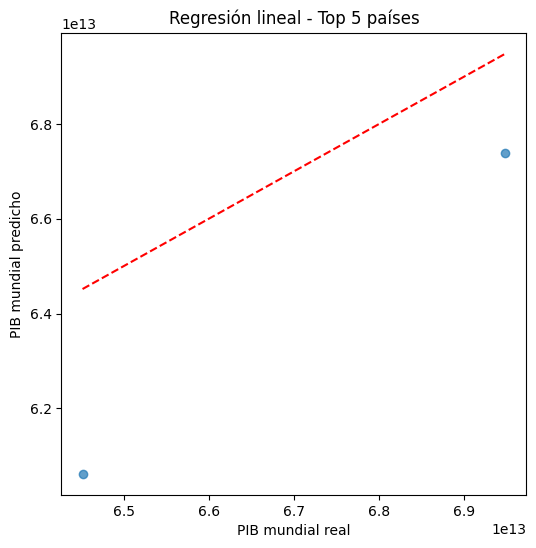

In [ ]:
# --- Gráfico real vs predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("PIB mundial real")
plt.ylabel("PIB mundial predicho")
plt.title("Regresión lineal - Top 5 países")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()

###Analisis acitvidad 1

Con el analisis de correlación y la regresion lineal multiple podemos  inferir que los PIB de los paises seleccionados TOP5 tienen una fuerte relación con el PIB mundial. R2 siendo perfecto en 1.0 explica la variacion. Entonces podemos decir que estos paises siguien la tendencia global y estan fuertemente alineadas.

#Actividad 2
Te proponemos entonces que realices ahora la siguiente actividad con los conceptos leídos anteriormente.

Para esta actividad se ha creado un archivo usuarios_win_mac_lin.csv con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Nuestra información de entrada son 4 características que se tomó de una web que utiliza Google Analytics y son:

- Duración de la visita en Segundos
- Cantidad de Páginas Vistas durante la Sesión
- Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc)
- Suma del Valor de las acciones (cada acción lleva asociada una valoración
de importancia)

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:
- 0 – Windows
- 1 – Macintosh
- 2 -Linux

Recorre la ejecución de cada una de las celdas de la Jupyter Notebook
Regresion_logistica.ipynb que se encuentra en el repositorio de la materia y verifica que sucede cuando realizamos la clasificación (o predicción) de tipo de usuario cuando se altera los valores de las variables.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Carga de datos
df_usuarios = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AA clase 4/usuarios_win_mac_lin.csv')


In [ ]:
df_usuarios.info()
df_usuarios.describe()
df_usuarios.columns
df_usuarios.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


,0
duracion,0
paginas,0
acciones,0
valor,0
clase,0


In [ ]:
# Vista inicial
print("Primeras filas del dataset:")
print(df_usuarios.head())

print("\nDistribución de clases:")
print(df_usuarios['clase'].value_counts())

Primeras filas del dataset:
   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2

Distribución de clases:
clase
0    86
2    44
1    40
Name: count, dtype: int64


In [ ]:
df_usuarios.tail(170)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


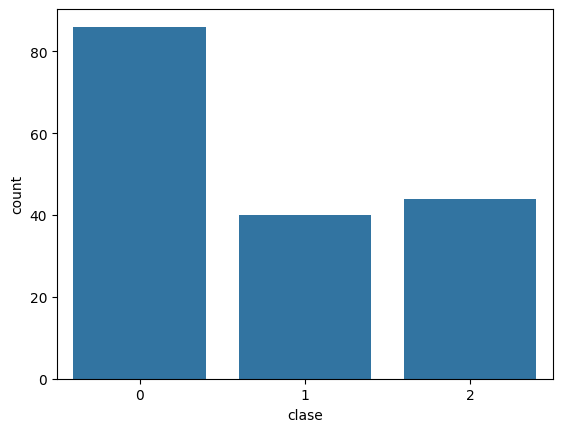

In [ ]:
#histograma sobre la distribucion de clases
sns.countplot(x='clase', data=df_usuarios)
plt.show()

In [ ]:
#Creacion de arreglos.
X_data = df_usuarios[['duracion', 'paginas', 'acciones', 'valor']]
Y_data = df_usuarios['clase']

X = np.array(X_data)
Y = np.array(Y_data)

In [ ]:
# División en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
# Entrenamiento del modelo
modelo = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
modelo.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Evaluación del modelo (usamos los datos de testeo)
Y_pred = modelo.predict(X_test)

# Calcula la precisión (accuracy), % de predicciones correctas que hizo el modelo
print("Precisión del modelo:", round(accuracy_score(Y_test, Y_pred), 2))


Precisión del modelo: 0.76


In [ ]:
#regresión contraida
print("Matriz de confusión:")
print(confusion_matrix(Y_test, Y_pred))



Matriz de confusión:
[[9 0 1]
 [3 2 0]
 [0 0 2]]


Matriz de confusión:


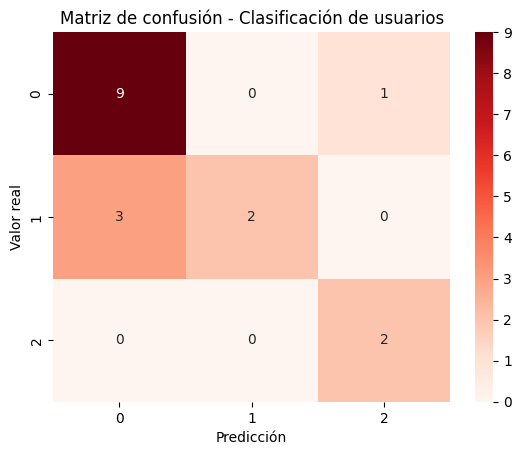


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       1.00      0.40      0.57         5
           2       0.67      1.00      0.80         2

    accuracy                           0.76        17
   macro avg       0.81      0.77      0.73        17
weighted avg       0.81      0.76      0.74        17



In [ ]:
print("Matriz de confusión:")
cm = confusion_matrix(Y_test, Y_pred, labels=modelo.classes_)

# Mapa de calor para visualizar mejor
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de confusión - Clasificación de usuarios")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

print("\nReporte de clasificación:")
print(classification_report(Y_test, Y_pred))

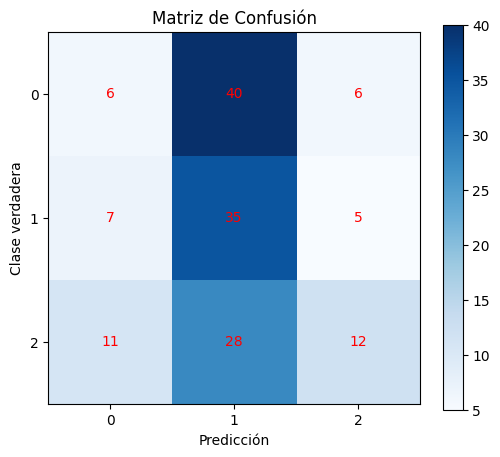

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        52
           1       0.34      0.74      0.47        47
           2       0.52      0.24      0.32        51

    accuracy                           0.35       150
   macro avg       0.37      0.37      0.32       150
weighted avg       0.37      0.35      0.31       150

Precisión global del modelo: 0.35


In [ ]:
# Cantidad de usuarios
n_usuarios = 150

# Generar datos aleatorios
duracion = np.random.randint(1, 3500, size=n_usuarios)
paginas = np.random.randint(1, 10, size=n_usuarios)
acciones = np.random.randint(1, 60, size=n_usuarios)
valor = np.random.randint(1, 400, size=n_usuarios)
clase = np.random.choice([0, 1, 2], size=n_usuarios)

# DataFrame completo
df = pd.DataFrame({
    'duracion': duracion,
    'paginas': paginas,
    'acciones': acciones,
    'valor': valor,
    'clase': clase
})

# Predicción
predicciones = modelo.predict(df[['duracion', 'paginas', 'acciones', 'valor']].values)
df['prediccion'] = predicciones

# Matriz de confusión
cm = confusion_matrix(df['clase'], df['prediccion'])

# Mostrar matriz con colores
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([0,1,2], ['0','1','2'])
plt.yticks([0,1,2], ['0','1','2'])
plt.xlabel('Predicción')
plt.ylabel('Clase verdadera')

# Mostrar valores
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()


# Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(df['clase'], df['prediccion'], target_names=['0','1','2']))

# Precisión global del modelo
precision_global = accuracy_score(df['clase'], df['prediccion'])
print(f"Precisión global del modelo: {precision_global:.2f}")

#Actividad 3

Objetivo:
Construir un modelo de regresión lineal múltiple para predecir la presión arterial de las personas en función de diferentes variables explicativas.

Dataset: dataset_regresion_multiple.csv
Columnas incluidas:

edad: Edad de la persona (años).

horas_ejercicio: Horas semanales de ejercicio físico.

peso: Peso corporal (kg).

estres: Nivel de estrés percibido (1 a 10).

ingresos: Ingreso anual en pesos.

horas_tv: Horas semanales viendo televisión.

presion_arterial: Variable objetivo (mmHg).

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AA clase 4/dataset_regresion_multiple.csv', sep=';')
df.head()

,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74


In [ ]:
df.info()
df.describe()
df.columns
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              100 non-null    int64  
 1   horas_ejercicio   100 non-null    int64  
 2   peso              100 non-null    int64  
 3   estres            100 non-null    int64  
 4   ingresos          100 non-null    int64  
 5   horas_tv          100 non-null    int64  
 6   presion_arterial  100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


,0
edad,0
horas_ejercicio,0
peso,0
estres,0
ingresos,0
horas_tv,0
presion_arterial,0


                      edad  horas_ejercicio      peso    estres  ingresos  \
edad              1.000000        -0.195928 -0.000361 -0.174863 -0.114863   
horas_ejercicio  -0.195928         1.000000 -0.021882 -0.041216 -0.005404   
peso             -0.000361        -0.021882  1.000000  0.056342 -0.018638   
estres           -0.174863        -0.041216  0.056342  1.000000 -0.079145   
ingresos         -0.114863        -0.005404 -0.018638 -0.079145  1.000000   
horas_tv          0.139984         0.058045  0.012098 -0.130028 -0.034992   
presion_arterial  0.418731        -0.358865  0.588843  0.366368 -0.009394   

                  horas_tv  presion_arterial  
edad              0.139984          0.418731  
horas_ejercicio   0.058045         -0.358865  
peso              0.012098          0.588843  
estres           -0.130028          0.366368  
ingresos         -0.034992         -0.009394  
horas_tv          1.000000          0.040789  
presion_arterial  0.040789          1.000000  


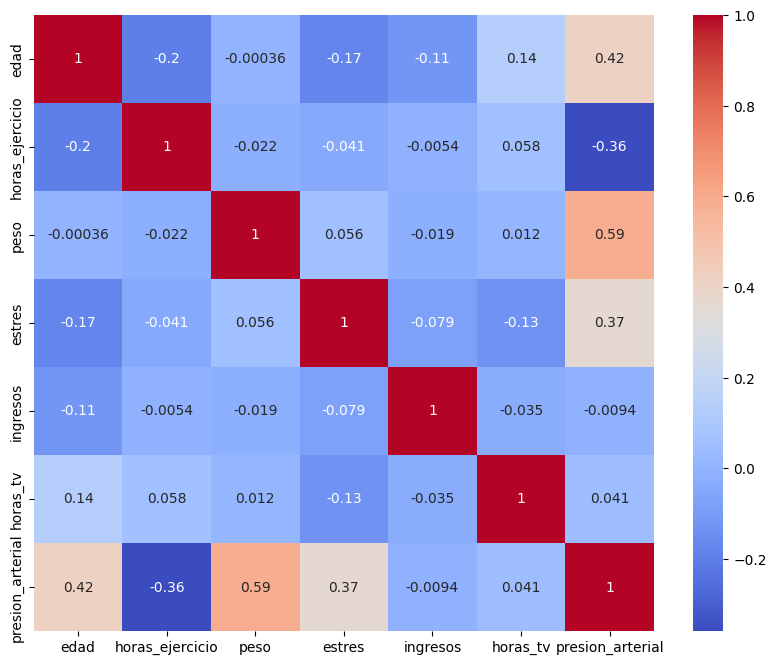

In [ ]:
# Matriz de correlación
correlacion = df.corr()
print(correlacion)

# Mapa de calor de correlación
plt.figure(figsize=(10,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Definir variables predictoras y variable objetivo
X = df[['edad', 'horas_ejercicio', 'peso', 'estres', 'ingresos', 'horas_tv']]
y = df['presion_arterial']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Coeficientes
coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print(coef)

# Intercepto
print("Intercepto:", modelo.intercept_)

          Variable  Coeficiente
0             edad     0.704516
1  horas_ejercicio    -1.606815
2             peso     0.796449
3           estres     3.566095
4         ingresos     0.000098
5         horas_tv     0.133066
Intercepto: -19.895962407050817


In [ ]:
# Ordenar variables por correlación absoluta con la presión arterial
correlacion_presion = correlacion['presion_arterial'].drop('presion_arterial').abs().sort_values(ascending=False)
print(correlacion_presion)


peso               0.588843
edad               0.418731
estres             0.366368
horas_ejercicio    0.358865
horas_tv           0.040789
ingresos           0.009394
Name: presion_arterial, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# calculamos las métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")


R²: 0.708
RMSE: 10.362
MAE: 8.600
